In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("spam_data.csv")
df

,label,message
0,spam,Earn money from home easily. Join today!
1,spam,Exclusive rewards available. Register now!
2,ham,Did you finish your homework?
3,ham,Happy Birthday! Have a wonderful day!
4,ham,Good morning! Have a nice day.
...,...,...
495,ham,I’ll call you once I reach home.
496,spam,"You’ve won a lottery of ₹1,00,000. Contact us ..."
497,ham,Let’s meet at 6 near the mall.
498,ham,Good morning! Have a nice day.


In [3]:
x=df["message"]
y=df["label"]

In [4]:
Vectorizer=CountVectorizer()
x_vect=Vectorizer.fit_transform(x)
x_vect

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3335 stored elements and shape (500, 174)>

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_vect,y,test_size=0.2,random_state=42)

In [6]:
model=MultinomialNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
y_pred=model.predict(x_test)
y_pred

array(['spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
       'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham'], dtype='<U4')

In [8]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [9]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[68,  0],
       [ 0, 32]])

In [10]:
cross=cross_validate(model,x_vect,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.00426173, 0.        , 0.        , 0.        , 0.        ]),
 'score_time': array([0.        , 0.        , 0.00663376, 0.        , 0.        ]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

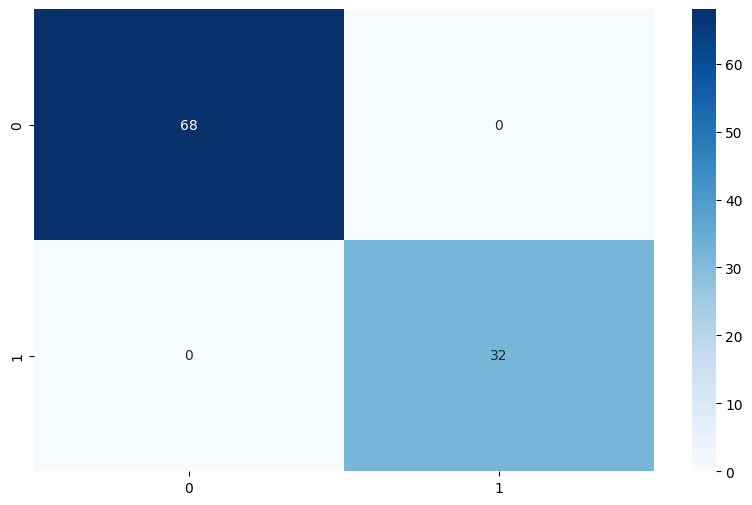

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.show()

In [12]:
new_data=pd.DataFrame({"message":["I'll call you once I reach home."]})
data=Vectorizer.transform(new_data["message"])
predict=model.predict(data)
predict

array(['ham'], dtype='<U4')